We will be understanding the concept of linear regression along with the regularization parameter on the dataset given below which has multiple attributes. Medical Dataset (https://www.kaggle.com/sudhirnl7/linear-regression-tutorial/data): The medical cost dataset comprises of independent attributes like age, sex, BMI (body mass index), children, smoker,
and region. The charge/cost is a dependent feature. Our goal is to predict the individual medical costs billed by the health insurance.

In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import io
df=pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1. Feature Normalization: As discussed in the class, we first have to standardize all the features by subtracting with the mean and dividing by the standard deviation. Verify your technique by computing the mean and variance of the transformed data and check if the mean is 0 and variance is 1.

In [3]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['sex']=label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])
df['region']=label_encoder.fit_transform(df['region'])
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [4]:
import numpy as np
cols=['age','sex','bmi','children','smoker','region','charges']
for i in cols:
  mean_data=np.mean(df[i])
  std_data=np.std(df[i])
  print("mean of",i,"=",mean_data)
  print("standard deviation of",i,"=",std_data)
  print()
  data=[]
  for j in df[i]:
    data.append((j-mean_data)/std_data)
  df[i]=data
#print(df.head())

mean of age = 39.20702541106129
standard deviation of age = 14.04470903895454

mean of sex = 0.5052316890881914
standard deviation of sex = 0.4999726286800901

mean of bmi = 30.663396860986538
standard deviation of bmi = 6.095907641589428

mean of children = 1.0949177877429
standard deviation of children = 1.2050421724928453

mean of smoker = 0.20478325859491778
standard deviation of smoker = 0.40354315208434366

mean of region = 1.515695067264574
standard deviation of region = 1.1044719546667299

mean of charges = 13270.422265141257
standard deviation of charges = 12105.484975561605



In [219]:
#verification of mean and standard deviation
#print(df)
for i in cols:
  mean_data=np.mean(df[i])
  std_data=np.std(df[i])
  print("mean of",i,"=",mean_data)
  print("standard deviation of",i,"=",std_data)
  print()

mean of age = -1.541699835391286e-16
standard deviation of age = 1.0

mean of sex = -2.688432436312038e-16
standard deviation of sex = 1.000000000000011

mean of bmi = 1.518424980502844e-15
standard deviation of bmi = 1.0000000000000004

mean of children = 1.045501503010237e-17
standard deviation of children = 1.0000000000000016

mean of smoker = -3.787038777570414e-16
standard deviation of smoker = 0.9999999999999856

mean of region = 6.318645988430917e-17
standard deviation of region = 0.9999999999999862

mean of charges = -6.920224234210617e-17
standard deviation of charges = 1.0000000000000004



In [358]:
test_size=0.2
X=df.drop(columns=['charges']).copy()
y=df['charges']
index_test=int(len(df)*test_size)
X_test=X[0:index_test]
y_test=y[0:index_test]

df_rem=df[index_test:]
print(X_test.shape), print(y_test.shape)
#print(df_rem)

(267, 6)
(267,)


(None, None)

3. Ridge-Regression: Here, implement your own function ridgereg(X, Y, λ) that calcu-lates the linear least square solution with the ridge regression penalty parameter λ and return regression weights. Use gradient descent technique to find these weights. Imple-ment predridgereg(X, weights) that returns Y given the input X with learnt weights.

In [359]:
def predridgereg(X,w):
  y_pred=np.dot(X,w)
  return y_pred

In [360]:
def ridgereg(X,y,l,w):
  lr=0.001
  iterations=500
  m=len(y)
  X=X.reshape(964,6)
  y=y.reshape(964,1)
  for it in range(iterations):
    prediction=np.dot(X,w)
    prediction=prediction.reshape(964,1)
    w=w-(np.multiply(lr,(np.dot(np.transpose(X),(np.subtract(prediction,y))))) + np.multiply(l,w))/m
  return w

2. K−Fold Cross Validation Randomly partition the data into a training, validation, and test set. Fix 20% of the instances into the test set. For the remaining data perform the below experiments with K−fold cross validation. You can take the value of K to be 10.

In [361]:
from random import randrange
def k_fold_cv(dataframe,folds,l):
  fold_size=int(len(dataframe)/folds)
  copy_dataframe=dataframe.copy()
  train_data=list()
  rmse=[]
  test_error=[]
  w=np.random.randn(6,1)
  for i in range(folds):
    validate_data=list()
    while (len(validate_data)<fold_size):
      index=randrange(len(copy_dataframe))
      validate_data.append(copy_dataframe.pop(index))
    train_data=copy_dataframe
    train_data=pd.DataFrame(train_data,columns=['age','sex','bmi','children','smoker','region','charges'])
    validate_data=pd.DataFrame(validate_data,columns=['age','sex','bmi','children','smoker','region','charges'])
    copy_dataframe=dataframe.copy()
    X_train=train_data.drop(columns=['charges'])
    y_train=train_data['charges']
    X_validate=validate_data.drop(columns=['charges'])
    y_validate=validate_data['charges']
    X_train=X_train.to_numpy(dtype='float32')
    y_train=y_train.to_numpy(dtype='float32')
    X_train=X_train.reshape(964,6)
    w=ridgereg(X_train,y_train,l,w) #Finding w
    y_pred=predridgereg(X_train,w) #Predicting Values 
    size=len(y_pred)
    mean_square_error=np.sqrt(np.sum(np.square(np.subtract(y_train,y_pred))))/size #Mean Square Error
    rmse.append(mean_square_error)
  rmse=np.min(rmse)
  return rmse,w

In [362]:
df_rem=df_rem.values.tolist()
l_plot=[]
rmse_plot=[]
for i in range(0,10):
  l=i
  l_plot.append(i)
  rmse,w=k_fold_cv(df_rem,10,l)
  rmse_plot.append(rmse)

4. Plot the mean square error for each of the dataset obtained from K−fold cross validation with respect to different λ values. Explain your finding and suggest what value of λ will you choose based on the obtained plot.

<function matplotlib.pyplot.show>

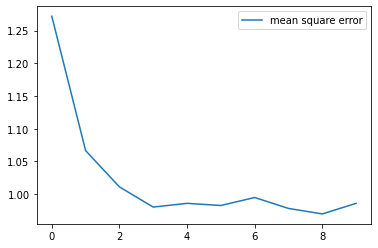

In [363]:
import matplotlib.pyplot as plt
plt.plot(l_plot,rmse_plot,label="mean square error")
plt.legend()
plt.show

5. Plot the training error, variance and test error against different values of λ. Explain your finding and suggest what value of λ will you choose based on the obtained plot. Explain your result in the context of bias variance trade off. Does this value coincide with the previous question?

In [364]:
l_plot=[]
train_error_plot=[]
test_error_plot=[]
variance_plot=[]
bias_sq_plot=[]
copy_dataframe=df_rem.copy()
train_data=list()
train_data=copy_dataframe
train_data=pd.DataFrame(train_data,columns=['age','sex','bmi','children','smoker','region','charges'])
X_train=train_data.drop(columns=['charges'])
y_train=train_data['charges']
X_train=X_train.to_numpy(dtype='float32')
y_train=y_train.to_numpy(dtype='float32')
X_train=X_train.reshape(1071,6)
X_test=X_test.to_numpy(dtype='float32')
y_test=y_test.to_numpy(dtype='float32')
X_test=X_test.reshape(267,6)
for i in range(0,10):
  l=i
  l_plot.append(i)
  rmse,w=k_fold_cv(df_rem,10,l)
  y_pred_train=predridgereg(X_train,w)
  size=len(y_pred_train)
  train_data_error=np.sqrt(np.sum(np.square(np.subtract(y_train,y_pred_train))))/size #Train Error
  train_error_plot.append(train_data_error)
  y_pred_test=predridgereg(X_test,w)
  size=len(y_pred_test)
  test_data_error=np.sqrt(np.sum(np.square(np.subtract(y_test,y_pred_test))))/size #Test Error
  test_error_plot.append(test_data_error)
  variance=np.mean((np.subtract(y_pred_test,np.mean(y_pred_test)))**2) #Variance
  variance_plot.append(variance)
  bias_sq=(np.subtract(np.mean(y_pred_test),np.mean(y_test)))**2 #Bias^2
  bias_sq_plot.append(bias_sq)

<function matplotlib.pyplot.show>

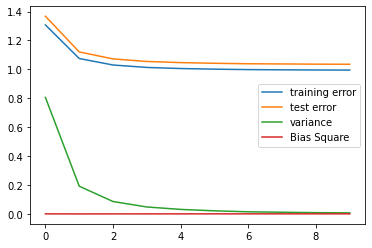

In [365]:
import matplotlib.pyplot as plt
plt.plot(l_plot,train_error_plot,label="training error")
plt.plot(l_plot,test_error_plot,label="test error")
plt.plot(l_plot,variance_plot,label="variance")
plt.plot(l_plot,bias_sq_plot,label="Bias Square")
plt.legend()
plt.show

**Observations:**

Accordint to the graph of Mean Square Error the curve for MSE becomes flat after lambda=8 i.e ln(lambda)=2.07 and also after plotting the train error, test error and variance with bias^2 we can observe the value of lambda as the intersecting point of bias^2 and variance i.e. around 8 i.e ln(lambda)=2.07.
So yes the value of lambda is almost same in both the cases.

With respect to bias variance tradeoff the model is giving High Variance and Low Bias at lambda < 4 but when lambda > = 4 then then we have low variance and low bias so this is the value that we needed. 
